In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from FoodWeb import FoodWeb, NOT_ALIVE_MARK
from FoodWeb_IO import readFW_SCOR
from FoodWeb_IO import writeXLS
import networkx as nx

import matplotlib.pyplot as plt
import pylab

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [3]:
import glob
food_webs = [readFW_SCOR(net_path) for net_path in glob.glob('./data/*')]

In [4]:
for web in food_webs:
    print(f'{web.title[:30]} --> {web.n}, {web.n_living}')

Upper Chesapeake Bay in Summer --> 34, 28
Albatross Bay _ 465 ,   bay/fj --> 99, 92
USA, Mid Atlantic Bight _ 99 , --> 55, 54
Flow network of St Marks febs2 --> 51, 40
Table 9. Flow data for the Thu --> 33, 29
Alaska, Prince William Sound _ --> 19, 18
"Mdloti Network, March 2003, i --> 46, 43
Bothnian Bay; Sandbert, et al. --> 12, 10
FLORIDA BAY TROPHIC EXCHANGE M --> 125, 104
Oneida Post ZM Unbalanced      --> 76, 73
Bay of Biscay _ 335 ,   contin --> 32, 30


In [5]:
net = food_webs[1]

In [6]:
net.nodeDF['Biomass'] = net.nodeDF.Biomass.astype(float)
net.nodeDF['Import'] = net.nodeDF.Import.astype(float)
net.nodeDF['Export'] = net.nodeDF.Export.astype(float)
net.nodeDF['Respiration'] = net.nodeDF.Respiration.astype(float)

In [8]:
colors = {
    -1: 'lightblue',
    -2: 'blue',
    -3: 'lighgreen',
    -4: 'green',
    -5: 'lightred',
    1: 'lightblue',
    2: 'blue',
    3: 'lighgreen',
    4: 'green',
    5: 'lightred',    
    6: 'lightblue',
    7: 'blue',
    8: 'lighgreen',
    9: 'green',
    10: 'lightred'    
}


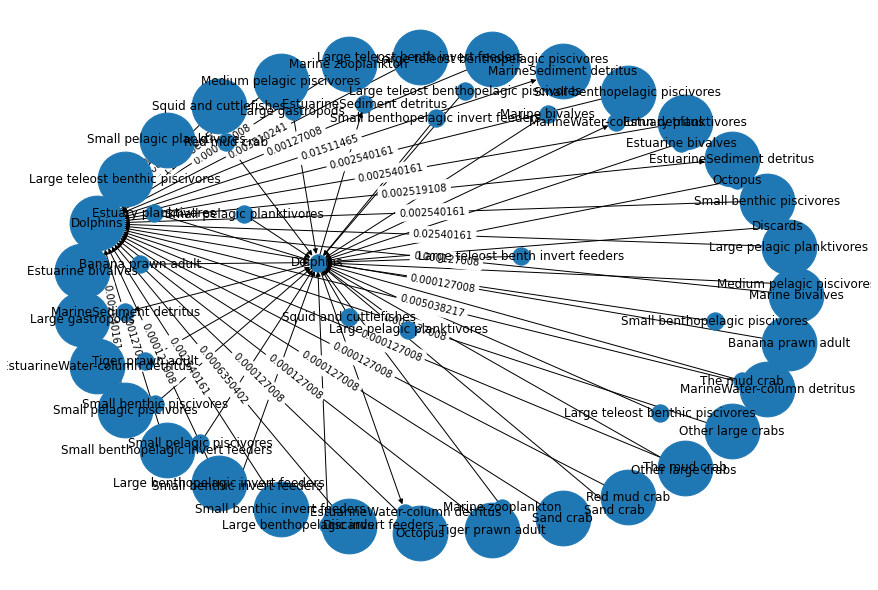

In [9]:
g = nx.DiGraph(directed=True)

nodes = set()
weighted_flows = []
for flow in net.getFlows(True):
    if flow[0] == 'Dolphins' or flow[1] == 'Dolphins':
        weighted_flows.append((flow[0], flow[1], flow[2]))
        nodes.add(flow[0])
        nodes.add(flow[1])

g.add_nodes_from(nodes)
g.add_weighted_edges_from(weighted_flows)

nx.draw(g,with_labels=True)
plt.draw()


edge_labels=dict([((u,v,),d['weight']) for u,v,d in g.edges(data=True)])

pos=nx.circular_layout(g)
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
nx.draw(g,pos, node_size=3000, with_labels=True)

In [10]:
import networkx as nx
from pyvis.network import Network

nt = Network(notebook=True, height="500px", width="100%", layout=False, directed=True)

nodes = set()
weighted_flows = []
for flow in net.getFlows(True):
    if flow[0] == 'Dolphins' or flow[1] == 'Dolphins':
        weighted_flows.append((flow[0], flow[1], flow[2]))
        nodes.add(flow[0])
        nodes.add(flow[1])

for name in nodes:
    nt.add_node(name, label=name, color = colors[round(net.nodeDF[net.nodeDF.Names == name].TrophicLevel.values[0])])
        
nt.add_edges(weighted_flows)
nt.show_buttons(filter_="physics")
nt.show("mygraph.html")

# np kolor to poziom troficzny
# odleglosc = % diety

In [11]:
import networkx as nx
from pyvis.network import Network

nt = Network(notebook=True, height="500px", width="100%", layout=True, directed=True)

nodes = set()
weighted_flows = []
for flow in net.getFlows(True):
    if flow[0] == 'Dolphins' or flow[1] == 'Dolphins':
        weighted_flows.append((flow[0], flow[1], flow[2]))
        nodes.add(flow[0])
        nodes.add(flow[1])

for name in nodes:
    # trophic_level = round(net.nodeDF[net.nodeDF.Names == name].TrophicLevel.values[0])
    trophic_level = net.nodeDF[net.nodeDF.Names == name].TrophicLevel.values[0]
    nt.add_node(name, label=name, level=trophic_level, color = colors[round(trophic_level)])
        
nt.add_edges(weighted_flows)
nt.show_buttons(filter_="physics")
nt.show("mygraph.html")

In [13]:
import networkx as nx
from pyvis.network import Network

def draw_for_node(node_name):
    nt = Network(notebook=True, height="500px", width="100%", layout=True, directed=True)

    nodes = set()
    weighted_flows = []
    minus_nodes = []
    for flow in net.getFlows(True):
        if flow[0] == node_name or flow[1] == node_name:
            weighted_flows.append((flow[0], flow[1], flow[2]))
            nodes.add(flow[0])
            nodes.add(flow[1])
            if flow[0] == node_name:
                minus_nodes.append(flow[1])


    dolphin_trophic = net.nodeDF[net.nodeDF.Names == node_name].TrophicLevel.values[0]

    for name in nodes:
        # trophic_level = round(net.nodeDF[net.nodeDF.Names == name].TrophicLevel.values[0])
        trophic_level = net.nodeDF[net.nodeDF.Names == name].TrophicLevel.values[0]
        if name in minus_nodes:
            trophic_level = trophic_level + dolphin_trophic
        nt.add_node(name, label=name, level=trophic_level, title=f'Trophic Level: {trophic_level:.2}', color = colors[round(trophic_level)])

    for flow in weighted_flows:
        nt.add_edge(flow[0], flow[1], title=f'Weight: {flow[2]:.4}', label=f'{flow[2]:.2}') #  value=flow[2]
#     nt.add_edges(weighted_flows)
    nt.show_buttons(filter_="physics")
    nt.show("mygraph.html")
    return nt

In [14]:
draw_for_node('Dolphins').show('mygraph.html')

In [15]:
draw_for_node('MarineSediment detritus').show('mygraph.html')